In [1]:
# Load python modules

import pandas as pd # for the DataFrame
import numpy as np # for the math

import rpy2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext rpy2.ipython
%run -m rpy2.situation

Python version:
3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:01:00) 
[GCC 7.3.0]
Looking for R's HOME:
    Environment variable R_HOME: /casa/kj/conda/envs/mini/lib/R
    Calling `R RHOME`: /casa/kj/conda/envs/mini/lib/R
    InstallPath in the registry: *** Only available on Windows ***
R version:
    In the PATH: R version 3.5.1 (2018-07-02) -- "Feather Spray"
    Used to build rpy2: 3-5.1--74947
Additional directories to load R packages from:
None


In [2]:
%R .libPaths()

array(['/casa/kj/conda/envs/mini/lib/R/library'], dtype='<U38')

In [3]:
# Load the taps from the uniprot
df_uniprot = pd.read_excel("./uniprot.xlsx")
df_uniprot.head() # Show the first 5 lines

,Entry,Entry name,Protein names,Gene names,Organism,Mass,Length,Gene ontology (GO),Gene ontology (biological process),Gene ontology (molecular function),Gene ontology (cellular component),Subcellular location [CC]
0,Q4LEZ3,AARD_HUMAN,Alanine and arginine-rich domain-containing pr...,AARD C8orf85,Homo sapiens (Human),"17,575",155,lung development [GO:0030324],lung development [GO:0030324],NaN,NaN,NaN
1,Q96SE0,ABHD1_HUMAN,Protein ABHD1 (EC 3.1.1.-) (Alpha/beta hydrola...,ABHD1 LABH1,Homo sapiens (Human),"45,207",405,integral component of membrane [GO:0016021]; a...,cellular lipid metabolic process [GO:0044255];...,acylglycerol lipase activity [GO:0047372]; lip...,integral component of membrane [GO:0016021],SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...
2,Q9UGJ0,AAKG2_HUMAN,5'-AMP-activated protein kinase subunit gamma-...,PRKAG2,Homo sapiens (Human),"63,066",569,cytosol [GO:0005829]; extracellular space [GO:...,ATP biosynthetic process [GO:0006754]; cell cy...,ADP binding [GO:0043531]; AMP-activated protei...,cytosol [GO:0005829]; extracellular space [GO:...,NaN
3,Q9H221,ABCG8_HUMAN,ATP-binding cassette sub-family G member 8 (St...,ABCG8,Homo sapiens (Human),"75,679",673,apical plasma membrane [GO:0016324]; ATP-bindi...,cholesterol efflux [GO:0033344]; cholesterol h...,"ATPase activity, coupled to transmembrane move...",apical plasma membrane [GO:0016324]; ATP-bindi...,SUBCELLULAR LOCATION: Cell membrane {ECO:00003...
4,Q8IZY2,ABCA7_HUMAN,ATP-binding cassette sub-family A member 7 (AB...,ABCA7,Homo sapiens (Human),"234,350",2146,ATP-binding cassette (ABC) transporter complex...,amyloid-beta clearance by cellular catabolic p...,apolipoprotein A-I receptor activity [GO:00341...,ATP-binding cassette (ABC) transporter complex...,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...


In [4]:
# Load the MS results (only the LFQ intensities)
df_MS = pd.read_csv("./iBAQ_values_from_MaxQaunt_Analysis.csv")
df_MS.head()

,Protein IDs,142_1,142_2,142_3,17_1,17_2,17_3,No Bait_1,No Bait_2,No Bait_3
0,sp|A0JLT2|MED19_HUMAN,0.0,82600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sp|A2RTX5|SYTC2_HUMAN,0.0,0.0,0.0,0.0,9790.0,8070.0,0.0,0.0,0.0
2,sp|A6NHQ2|FBLL1_HUMAN,183000.0,198000.0,0.0,167000.0,0.0,0.0,0.0,0.0,87400.0
3,sp|A6NKT7|RGPD3_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8340.0
4,sp|A8K2U0|A2ML1_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10700.0,0.0


In [5]:
# Select only the Uniprot entry from the Protein IDs in the original excel file
df_MS['Entry'] = df_MS.apply(lambda x: x['Protein IDs'].split('|')[1], axis=1)
df_MS.head()

,Protein IDs,142_1,142_2,142_3,17_1,17_2,17_3,No Bait_1,No Bait_2,No Bait_3,Entry
0,sp|A0JLT2|MED19_HUMAN,0.0,82600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0JLT2
1,sp|A2RTX5|SYTC2_HUMAN,0.0,0.0,0.0,0.0,9790.0,8070.0,0.0,0.0,0.0,A2RTX5
2,sp|A6NHQ2|FBLL1_HUMAN,183000.0,198000.0,0.0,167000.0,0.0,0.0,0.0,0.0,87400.0,A6NHQ2
3,sp|A6NKT7|RGPD3_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8340.0,A6NKT7
4,sp|A8K2U0|A2ML1_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10700.0,0.0,A8K2U0


In [6]:
# Remove the protein ID tap
df_MS = df_MS.drop(['Protein IDs'], axis=1)
df_MS.head()

,142_1,142_2,142_3,17_1,17_2,17_3,No Bait_1,No Bait_2,No Bait_3,Entry
0,0.0,82600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0JLT2
1,0.0,0.0,0.0,0.0,9790.0,8070.0,0.0,0.0,0.0,A2RTX5
2,183000.0,198000.0,0.0,167000.0,0.0,0.0,0.0,0.0,87400.0,A6NHQ2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8340.0,A6NKT7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10700.0,0.0,A8K2U0


In [7]:
# Remove the All zero proteins
lNonAllZero = []
for i in df_MS.index:
    if sum([int(j>1) for j in list(df_MS.iloc[i,:len(df_MS.columns)-1])])!=0:
        lNonAllZero.append(i)
df_MS = df_MS.iloc[lNonAllZero,:]
df_MS.reset_index(drop=True, inplace=True)
df_MS.head()

,142_1,142_2,142_3,17_1,17_2,17_3,No Bait_1,No Bait_2,No Bait_3,Entry
0,0.0,82600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0JLT2
1,0.0,0.0,0.0,0.0,9790.0,8070.0,0.0,0.0,0.0,A2RTX5
2,183000.0,198000.0,0.0,167000.0,0.0,0.0,0.0,0.0,87400.0,A6NHQ2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8340.0,A6NKT7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10700.0,0.0,A8K2U0


In [8]:
# Rearrange the colums
df_MS = df_MS[['Entry',  'No Bait_1','No Bait_2', 'No Bait_3', '142_1','142_2','142_3',
               '17_1', '17_2', '17_3']]
df_MS.head()

,Entry,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3
0,A0JLT2,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0
1,A2RTX5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0
2,A6NHQ2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0
3,A6NKT7,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A8K2U0,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Check correlation
df_MS_NonZero = pd.DataFrame.copy(df_MS.iloc[:,1:])
lZero = []
for i in df_MS.index:
    if sum([int(j<1)for j in list(df_MS.iloc[i,1:])])>0:
        lZero.append(i)
df_MS_NonZero.drop(lZero, inplace=True)
df_MS_NonZero.head()

,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3
6,12100000.0,205000000.0,176000000.0,202000000.0,253000000.0,28100000.0,346000000.0,36900000.0,30400000.0
12,97200.0,460000.0,875000.0,371000.0,186000.0,1390000.0,7000000.0,235000.0,249000.0
41,121000.0,2230000.0,1500000.0,1690000.0,664000.0,334000.0,1010000.0,26800.0,218000.0
48,302000.0,1880000.0,1890000.0,1390000.0,2130000.0,972000.0,2610000.0,935000.0,904000.0
49,926000.0,3690000.0,2980000.0,2520000.0,1820000.0,1010000.0,3380000.0,1400000.0,428000.0


In [10]:
# Add Uniprot infomation to the df_MS
df_MS = pd.merge(df_MS, df_uniprot[["Entry", "Gene names", "Mass", "Gene ontology (cellular component)", "Gene ontology (molecular function)"]], left_on="Entry", right_on="Entry", how="left")
df_MS.head()

,Entry,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,A0JLT2,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19 LCMR1,"26,273",mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,A2RTX5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,"92,646",cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,A6NHQ2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,"34,803",box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,A6NKT7,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3 RGP3,"197,487",cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,A8K2U0,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1 CPAMD9,"161,107",extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [11]:
# Change the datatype 'NaN' into string "N/A (not available)"
df_MS.loc[:,['Gene names','Gene ontology (molecular function)']] = df_MS.loc[:,['Gene names','Gene ontology (molecular function)']].replace(np.nan, 'N/A')
df_MS['Gene ontology (cellular component)'] = df_MS['Gene ontology (cellular component)'].replace(np.nan, "N/A")
df_MS.head()

,Entry,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,A0JLT2,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19 LCMR1,"26,273",mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,A2RTX5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,"92,646",cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,A6NHQ2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,"34,803",box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,A6NKT7,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3 RGP3,"197,487",cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,A8K2U0,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1 CPAMD9,"161,107",extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [12]:
# Change the datatype 'NaN' into float (Mass column)
df_MS['Mass'] = df_MS['Mass'].replace(np.nan, ',0.001')
df_MS.head()

,Entry,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,A0JLT2,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19 LCMR1,"26,273",mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,A2RTX5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,"92,646",cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,A6NHQ2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,"34,803",box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,A6NKT7,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3 RGP3,"197,487",cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,A8K2U0,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1 CPAMD9,"161,107",extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [13]:
# Select the first gene name from the gene names
df_MS['Gene names'] = df_MS.apply(lambda x: x['Gene names'].split(' ')[0], axis=1)
df_MS.head()

,Entry,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,A0JLT2,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19,"26,273",mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,A2RTX5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,"92,646",cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,A6NHQ2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,"34,803",box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,A6NKT7,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3,"197,487",cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,A8K2U0,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1,"161,107",extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [14]:
# For entry whose gene name does not exist, Keep the entry as the gene name
for i in df_MS.index:
    if df_MS.ix[i,'Gene names'] == 'N/A':
        df_MS.ix[i,'Gene names'] = df_MS.ix[i,'Entry']
df_MS.head()

,Entry,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,A0JLT2,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19,"26,273",mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,A2RTX5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,"92,646",cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,A6NHQ2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,"34,803",box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,A6NKT7,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3,"197,487",cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,A8K2U0,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1,"161,107",extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [15]:
# Add entry name to the gene name if the gene name is duplicated
for i in df_MS.index:
    if df_MS['Gene names'].duplicated(keep='first')[i] == True:
        df_MS.ix[i,'Gene names'] = df_MS.ix[i,'Gene names'] + " (" +  df_MS.ix[i,'Entry'] + ")"
        
#Drop the entry column
df_MS.drop('Entry', axis=1, inplace=True)
df_MS.head()

,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19,"26,273",mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,"92,646",cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,"34,803",box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3,"197,487",cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1,"161,107",extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [16]:
# Remove ',' mark for the calculation in the Mass column
df_MS['Mass'] = df_MS.apply(lambda x: x['Mass'].replace(",",""), axis=1)
df_MS.head()

,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19,26273,mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,92646,cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,34803,box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3,197487,cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1,161107,extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [17]:
# Change the string into float in the Mass column
df_MS['Mass'] = df_MS.apply(lambda x: '%.3f' % (float(x['Mass'])/1000), axis=1)
df_MS.head()

,No Bait_1,No Bait_2,No Bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene names,Mass,Gene ontology (cellular component),Gene ontology (molecular function)
0,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19,26.273,mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,92.646,cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,34.803,box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3,197.487,cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1,161.107,extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [18]:
df_MS.columns

Index(['No Bait_1', 'No Bait_2', 'No Bait_3', '142_1', '142_2', '142_3',
       '17_1', '17_2', '17_3', 'Gene names', 'Mass',
       'Gene ontology (cellular component)',
       'Gene ontology (molecular function)'],
      dtype='object')

In [19]:
# Rename the columns
df_MS.columns = ['No bait_1', 'No bait_2', 'No bait_3','142_1', '142_2', '142_3', '17_1', '17_2', '17_3', 
                'Gene', 'Mass (kDa)','GO (cellular component)', 'GO (molecular function)']
df_MS.head()

,No bait_1,No bait_2,No bait_3,142_1,142_2,142_3,17_1,17_2,17_3,Gene,Mass (kDa),GO (cellular component),GO (molecular function)
0,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0,MED19,26.273,mediator complex [GO:0016592]; nuclear body [G...,transcription coregulator activity [GO:0003712...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0,TARSL2,92.646,cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; threonine-tRNA ligas...
2,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0,FBLL1,34.803,box C/D snoRNP complex [GO:0031428]; Cajal bod...,histone-glutamine methyltransferase activity [...
3,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,RGPD3,197.487,cytoplasm [GO:0005737]; nuclear pore [GO:00056...,Ran GTPase binding [GO:0008536]
4,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2ML1,161.107,extracellular exosome [GO:0070062]; extracellu...,peptidase inhibitor activity [GO:0030414]; ser...


In [20]:
# Dataframe for voom-limma
df_VL = df_MS.set_index('Gene').iloc[:,:9]
df_VL.head()

,No bait_1,No bait_2,No bait_3,142_1,142_2,142_3,17_1,17_2,17_3
Gene,,,,,,,,,
MED19,0.0,0.0,0.0,0.0,82600.0,0.0,0.0,0.0,0.0
TARSL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9790.0,8070.0
FBLL1,0.0,0.0,87400.0,183000.0,198000.0,0.0,167000.0,0.0,0.0
RGPD3,0.0,0.0,8340.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.0,10700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dID = {0:'No bait', 1:'142', 2:'17'}

# Make a dictionary for 2X2 square for comparison b/w Query and Reference
dPQMN = {}

for i in range(len(dID)):
    bait = dID[i]
 
    dID_nest = dID.copy()
    for i in range(len(dID)):
        if dID[i] == bait:
            del dID_nest[i]
    lID = list(dID_nest.values())
      
    dPQMN_bait = {}
    for ID in lID:
        dPQMN_ID = {}
        
        # Extract columns for "two" compared samples
        # Bait = Query, ID = Reference
        df_VL_nest = df_VL.loc[:,[bait+'_1', bait+'_2', bait+'_3', ID+'_1', ID+'_2', ID+'_3']]
         
            # Remove the all zero proteins (by selecting the non all zero)
        lNonAllZero_nest = []
        for i in df_VL_nest.reset_index().index:
            if sum([int(j>1) for j in list(df_VL_nest.reset_index().iloc[i,1:])])!=0:
                lNonAllZero_nest.append(i)
        df_VL_nest = df_VL_nest.reset_index().iloc[lNonAllZero_nest,:].set_index('Gene')
        
        # P (Genes for which both sample do not show detection for all triplicates)
        lP = []
        # Q (Genes for which both sample show detection in all triplicates)
        lQ = []
        # M (Genes for which Query shows detection in all triplicates but not Reference)
        lM = []
        # N (Genes for which Reference shows detection in all triplicates but not Query)
        lN = []        
                        
        for i in df_VL_nest.reset_index().index:
            if (sum([int(j>1) for j in list(df_VL_nest.reset_index().iloc[i,1:4])])!= 3) and (sum([int(j>1) for j in list(df_VL_nest.reset_index().iloc[i,4:7])])!=3):
                lP.append(df_VL_nest.reset_index().iloc[i,0])
            elif sum([int(j>1) for j in list(df_VL_nest.reset_index().iloc[i,1:])]) == 6:
                lQ.append(df_VL_nest.reset_index().iloc[i,0])
            elif (sum([int(j>1) for j in list(df_VL_nest.reset_index().iloc[i,1:4])]) == 3) and (sum([int(j>1) for j in list(df_VL_nest.reset_index().iloc[i,4:7])])!=3):
                lM.append(df_VL_nest.reset_index().iloc[i,0])
            else:
                lN.append(df_VL_nest.reset_index().iloc[i,0])     
        
        dPQMN_ID['P'] = lP
        dPQMN_ID['Q'] = lQ
        dPQMN_ID['M'] = lM
        dPQMN_ID['N'] = lN       
        
        dPQMN_bait[ID] = dPQMN_ID
        
    dPQMN[bait] = dPQMN_bait
    # dPQMN['Query']['Reference']['Q'] = Gene in group 'Q' from Query vs. Reference

In [22]:
# Make a dictionary for TMM normalized log2CPM for group 'Q'
dlog2CPM = {}

for i in range(len(dID)):
    bait = dID[i]
 
    dID_nest = dID.copy()
    for i in range(len(dID)):
        if dID[i] == bait:
            del dID_nest[i]
    lID = list(dID_nest.values())
      
    dlog2CPM_bait = {}
    for ID in lID:
        dlog2CPM_group = {}

        ### Group 'Q'
        df_VL_nest = df_VL.loc[dPQMN[bait][ID]['Q'], [bait+'_1', bait+'_2', bait+'_3', ID+'_1', ID+'_2', ID+'_3']]
            
        ## Run R to get TMM normalized log2CPM value
        counts = df_VL_nest # Count as DataFrame.
        gene_annotation = df_VL_nest.reset_index().iloc[:,0].T # Gene_annotation as Dataframe.T
        groups = [i.split("_")[0] for i in df_VL_nest.columns] # Group as list
               
        # Push the necessary data to R
        %Rpush counts gene_annotation groups
        
        # Load the edgeR and limma libraries
        %R library(edgeR)

        # Put the counts, groups, and annotation into a 'DGEList' object 
        %R x <- DGEList(counts=counts, group=unlist(groups), genes=gene_annotation)

        # TMM Normalization
        %R x <- calcNormFactors(x)
        %R -o x
        
        lEffLibSiz = np.array(x[1][1])*np.array(x[1][2])
        df_log2CPM = (df_VL_nest+0.5)*(10**6)

        for i in range(len(lEffLibSiz)):
            df_log2CPM.iloc[:,i] = np.log2((df_log2CPM.iloc[:,i])/(lEffLibSiz[i]+1))

        # Mean log2CPM : Divide the summation by the number of replicates with signal detection
        df_log2CPM[bait+'_mean'] = df_log2CPM.iloc[:,0:3].apply(lambda x: np.mean(x), axis=1)
        df_log2CPM[ID+'_mean'] = df_log2CPM.iloc[:,3:6].apply(lambda x: np.mean(x), axis=1)
        
        df_log2CPM.columns.name = bait + ' vs. ' + ID
        
        dlog2CPM_group['Q'] = df_log2CPM
           
        # Add group 'Q' to ID
        dlog2CPM_bait[ID] = dlog2CPM_group
    
    dlog2CPM[bait] = dlog2CPM_bait # dlog2CPM['Query']['Reference']['Q'] = TMM normalized dlog2CPM values

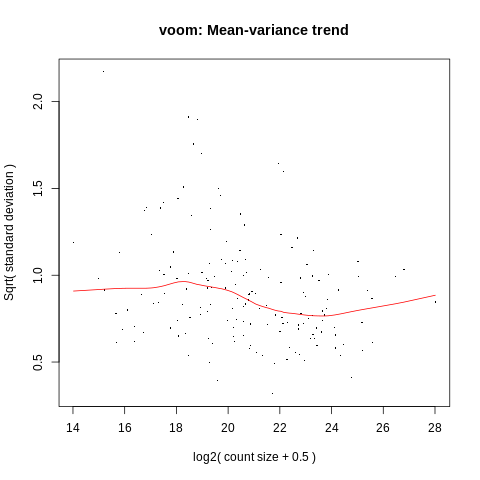

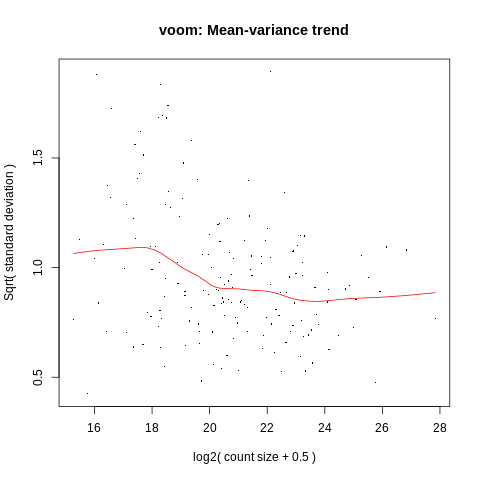

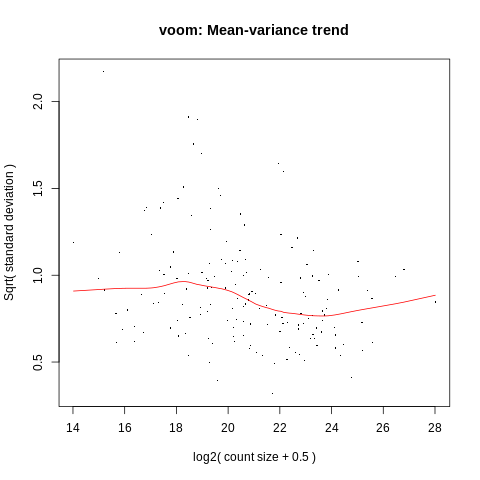

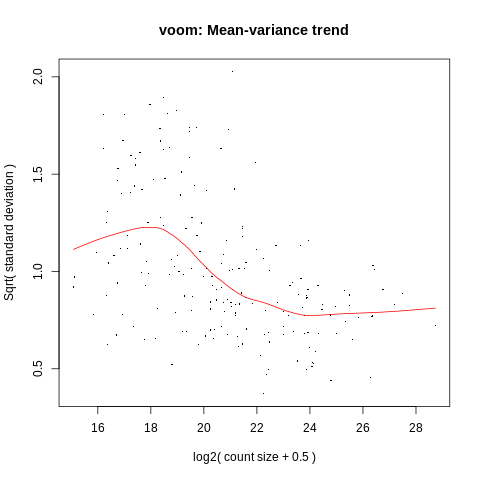

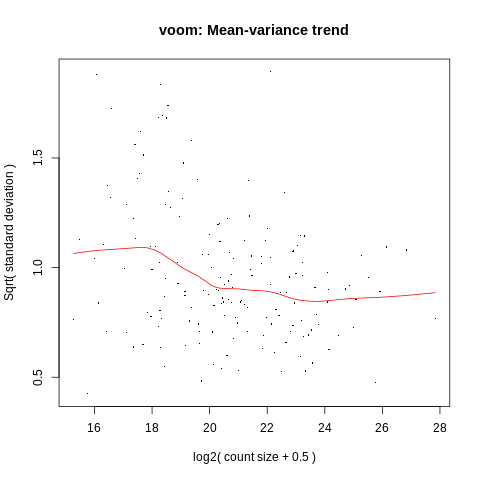

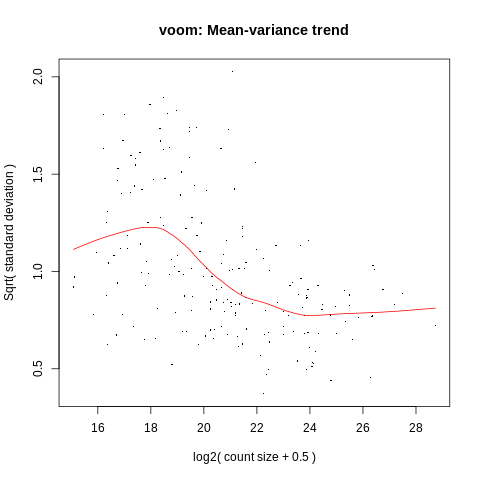

In [23]:
# Run limma for group q

# Make a design matrix X.
X = np.array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
X = np.matrix(X)

C_T = np.array([1,-1])

dStats = {}
for i in range(len(dID)):
    bait = dID[i]
 
    dID_nest = dID.copy()
    for i in range(len(dID)):
        if dID[i] == bait:
            del dID_nest[i]
    lID = list(dID_nest.values())
    
    dLimma = {}
    for ID in lID:
      
        df_VL_nest = df_VL.loc[dPQMN[bait][ID]['Q'],[bait+'_1', bait+'_2', bait+'_3', ID+'_1', ID+'_2', ID+'_3']]
                      
        counts = df_VL_nest # Count as DataFrame.
        design = pd.DataFrame(X) # Design as DataFrame.
        contrast = pd.DataFrame(C_T.T) # Constrat as DataFrame.
        gene_annotation = df_VL_nest.reset_index().iloc[:,0].T
        groups = [i.split("_")[0] for i in df_VL_nest.columns] # Group as list
               
        ## Run R
        # Push the necessary data to R
        %Rpush counts design contrast gene_annotation groups
        
        # Load the edgeR and limma libraries
        %R library(edgeR)
        %R library(limma)

        # Put the counts, groups, and annotation into a 'DGEList' object 
        %R x <- DGEList(counts=counts, group=unlist(groups), genes=gene_annotation)

        # TMM Normalization
        %R x <- calcNormFactors(x)
        
        # Run voom
        %R voomOutputs <- voom(x,design, plot=TRUE) # You can set 'span=' here ## You can add 'plot=TURE' here
        %R -o voomOutputs

        # Run limmma
        # fit the regression coefficients as specified in the design matrix
        %R limmaOutputs <- lmFit(voomOutputs, design, method='robust') # You can put method="robust" here
        ## G.K.Smyth recommended to use 'robust=TRUE' in eBayes
        %R regressionFit <- eBayes(limmaOutputs)

        # Fit the hypothesis tests as specified in the contrast matrix    
        %R contrastFit <- contrasts.fit(regressionFit, contrast)

        # Squeeze the hypothesis test p-values using empirical Bayes
        %R contrastFit <- eBayes(contrastFit)
        %R -o s2post s2post <- contrastFit$s2.post
        %R -o limmaOutputs limmaOutputs <- topTable(contrastFit,n=Inf,adjust="BH",sort.by='none')

        # Collection results from R and index them
        limmaOutputs = limmaOutputs.set_index('genes')
        limmaOutputs.columns = ['log2FC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B']
        limmaOutputs.columns.name = bait + ' vs. ' + ID

        #Add the Effect size(Cohen's d) into limmaOutputs
        limmaOutputs['s2post'] = s2post
        limmaOutputs['sqrt.s2post'] = np.sqrt(limmaOutputs['s2post'])
        limmaOutputs['EffSize'] = abs(limmaOutputs['log2FC']/(limmaOutputs['sqrt.s2post']))
        
        limmaOutputs = limmaOutputs[['log2FC', 'AveExpr', 'EffSize', 't', 'P.Value', 'adj.P.Val']]
       
        #Add the bait for comparison as a key and the corresponding limmaOutputs as value
        dLimma[ID] = limmaOutputs.sort_values('adj.P.Val')
        
    # Add to the dictionary
    dStats[bait] = dLimma
    # dStats['Query']['Reference'] = limmaOutputs for Query vs. Reference

In [24]:
# Filtering by cutoffs 
log2FC_cutoff = 2
adjPVal_cutoff = 5*10**(-2)
AveExpr_cutoff = 2

lBait = ['No bait', '142', '17']

dFiltered = {}

for bait in lBait:
    dBaits = {}
    dID_nest = dID.copy()
    for i in range(len(dID)):
         if dID[i] == bait:
            del dID_nest[i]
    lID = list(dID_nest.values())
    
    for i in range(len(dID)-1):
        lCutoff_volc = []
        for j in dStats[bait][lID[i]].index:
            if ((dStats[bait][lID[i]].loc[j,'log2FC'] > log2FC_cutoff).all()) and ((dStats[bait][lID[i]].loc[j,'adj.P.Val'] < adjPVal_cutoff).all()):
                lCutoff_volc.append(j)
        lCutoff_ma = []
        for j in dStats[bait][lID[i]].index:
            if ((dStats[bait][lID[i]].loc[j,'log2FC'] > log2FC_cutoff).all()) and ((dStats[bait][lID[i]].loc[j,'AveExpr'] > AveExpr_cutoff).all()):
                lCutoff_ma.append(j)

        dCutoffs = {}
        dCutoffs['volc'] = lCutoff_volc
        dCutoffs['ma'] = lCutoff_ma
        dCutoffs['vm'] = list(set(lCutoff_volc).intersection(lCutoff_ma))
        dBaits[lID[i]] = dCutoffs
    dFiltered[bait] = dBaits     
    #dFiltered['A']['B']['volc'] = list of adj.P.Val & log2FC filtered Proteins from the comparsion of A to B
    #dFiltered['A']['B']['ma'] = list of log2FC & AveExpr filtered Proteins from the comparsion of A to B
    #dFiltered['A']['B']['vm'] = list of adj.P.Val & log2FC & AveExpr filtered Proteins from the comparsion of A to B        

In [25]:
print('No bait', 'vs. 142 ' + str(dFiltered['No bait']['142']['vm']),
      '\n', 'vs. 17 ' + str(dFiltered['No bait']['17']['vm']))
print()
print('Pri-mir-142', '\n', 'vs. No bait ' + str(dFiltered['142']['No bait']['vm']))
print()
print('Pri-mir-17', '\n', 'vs. No bait ' + str(dFiltered['17']['No bait']['vm']))

No bait vs. 142 ['PABPN1', 'U2AF1L5', 'CDKN2AIP'] 
 vs. 17 ['ERH', 'SNRPD2', 'PUF60', 'RBM39', 'SF3B3']

Pri-mir-142 
 vs. No bait ['RPL27A', 'SRSF3', 'RPS6', 'RPL35', 'HNRNPH2', 'RPS9', 'GNL3', 'ILF3', 'RPL26', 'ADAR', 'RPL17', 'ILF2']

Pri-mir-17 
 vs. No bait ['RPL27A', 'HNRNPM', 'SRSF3', 'RPL35', 'RPS6', 'GNL3', 'RPS9', 'TRA2B', 'RPL26', 'TRA2A', 'RPL17', 'HIST1H1C', 'HIST1H4A']


In [26]:
dStats['142']['No bait'].to_csv("Stats_142_vs_NoBait_all.csv")

In [27]:
dStats['17']['No bait'].to_csv("Stats_17_vs_NoBait_all.csv")

In [28]:
dStats['142']['No bait'].loc[dFiltered['142']['No bait']['vm']].to_csv("Stats_142_vs_NoBait_significant.csv")

In [29]:
dStats['17']['No bait'].loc[dFiltered['17']['No bait']['vm']].to_csv("Stats_17_vs_NoBait_significant.csv")